In [20]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from sklearn.preprocessing import MinMaxScaler

# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0
%matplotlib inline

In [46]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [47]:
dataset = pd.read_csv('DedInside.csv', index_col = 'Date', parse_dates = ['Date'])
dataset

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...
2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA


In [49]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

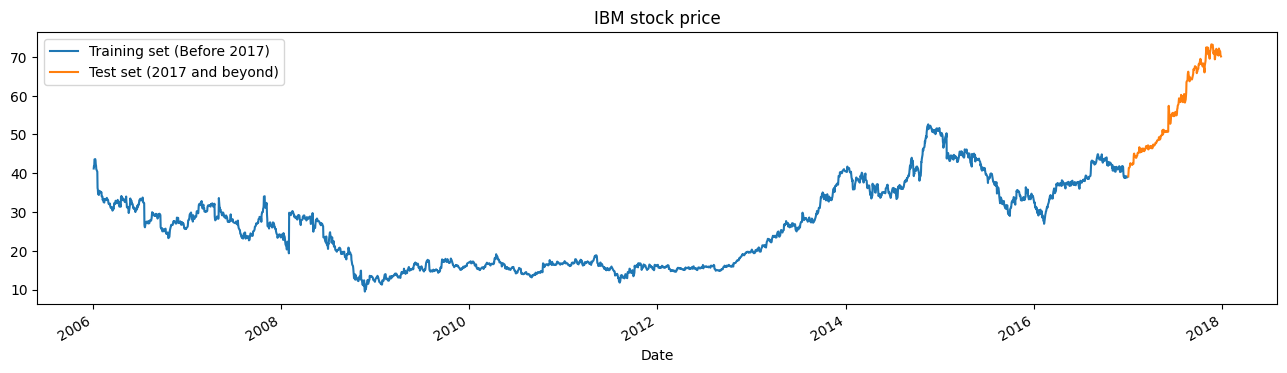

In [50]:
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [51]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [53]:
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [54]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [93]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set   
regressor.fit(X_train,y_train,epochs=10,batch_size=2)

Epoch 1/10
1354/1354 [==============================] - 44s 29ms/step - loss: 0.0071
Epoch 2/10
1354/1354 [==============================] - 40s 30ms/step - loss: 0.0034
Epoch 3/10
1354/1354 [==============================] - 41s 30ms/step - loss: 0.0027
Epoch 4/10
1354/1354 [==============================] - 41s 30ms/step - loss: 0.0024
Epoch 5/10
1354/1354 [==============================] - 42s 31ms/step - loss: 0.0019
Epoch 6/10
1354/1354 [==============================] - 41s 30ms/step - loss: 0.0018
Epoch 7/10
1354/1354 [==============================] - 43s 31ms/step - loss: 0.0018
Epoch 8/10
1354/1354 [==============================] - 41s 30ms/step - loss: 0.0018
Epoch 9/10
1354/1354 [==============================] - 41s 30ms/step - loss: 0.0016
Epoch 10/10
1354/1354 [==============================] - 42s 31ms/step - loss: 0.0015


In [78]:
# build the network
nb_features = data_train.shape[1]
nb_out = 1
model = Sequential()
model.add(LSTM(
 input_shape=(5, nb_features),
 units=100,
 return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(
 units=50,
 return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=nb_out, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])


In [94]:
dataset_total = pd.concat((df["High"][:'2016'],df["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 70:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

C:\Users\alone\AppData\Local\Temp\ipykernel_24936\1466124169.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dataset_total = pd.concat((df["High"][:'2016'],df["High"]['2017':]),axis=0)


In [95]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 2s 20ms/step


In [96]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

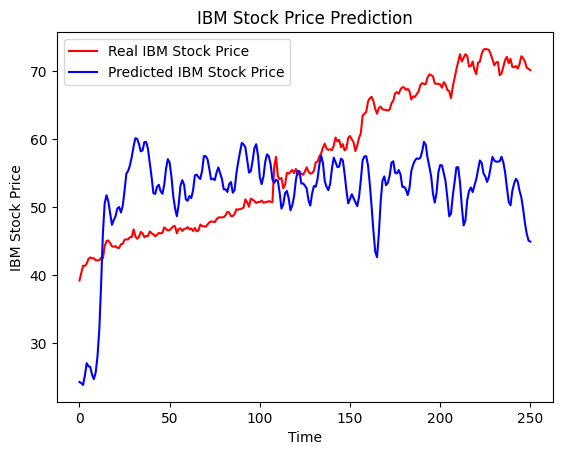

In [97]:
plot_predictions(test_set,predicted_stock_price)